In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, on = 'city', how = 'outer')

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [51]:
# Obtain the x and y coordinates for each of the three city types
# find city types
city_type = list(city_ride_df.groupby("type").count().index)

# creating blank lists to store the data
cities_by_type = []               
total_ride_per_city = []
average_fare_per_city = []        
driver_count_per_city = []

# loop through each city type
# perform same operations for each city and add it to the list
for x in city_type:
    
    sub_city_type_df = city_ride_df[city_ride_df["type"] == x]
    sub_city_group = sub_city_type_df.groupby("city")
    
    # city name, total rides, and avg fare, driver count
    cities = list(sub_city_group.first().index)
    sub_city_total_ride = list(sub_city_group.count()['ride_id'])
    sub_city_average_fare = list(sub_city_group.mean()["fare"])
    sub_city_driver_count = list(sub_city_group.first()['driver_count'])
    
    # append the list to the previously created list
    cities_by_type.append(cities)
    total_ride_per_city.append(sub_city_total_ride)
    average_fare_per_city.append(sub_city_average_fare)
    driver_count_per_city.append(sub_city_driver_count)

# min and max driver in all cities 
min_driver = city_ride_df['driver_count'].min()
max_driver = city_ride_df['driver_count'].max()

min_size = 25
max_size = 750

new_driver_count_per_city = [[(y-min_driver)/(max_driver - min_driver) * (max_size - min_size) + min_size
                              for y in x] 
                             for x in driver_count_per_city]

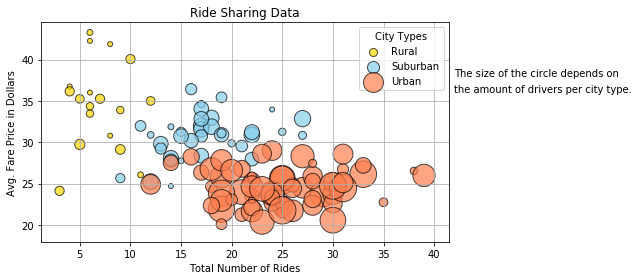

In [52]:
# Build the scatter plots for each city types
facecolor = ["Gold", "SkyBlue", "Coral"]

plt.figure(figsize = (9, 4))
# Build the scatter plots for each city types
for i in range(len(city_type)):
    plt.scatter(total_ride_per_city[i], average_fare_per_city[i], 
                s = new_driver_count_per_city[i],
                marker = "o",
                facecolors = facecolor[i],
                edgecolors = "black",
                alpha = 0.7,
               label = city_type[i])

# Incorporate the other graph properties
plt.title("Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Avg. Fare Price in Dollars")
plt.grid(True)

# Create a legend
plt.legend(loc = "best", title = "City Types")

# Incorporate a text label regarding circle size
plt.text(42, 38, "The size of the circle depends on")
plt.text(42, 36, "the amount of drivers per city type.")

# Save Figure
plt.tight_layout()
plt.savefig("bubble_plot.png")
plt.show()

## Total Fares by City Type

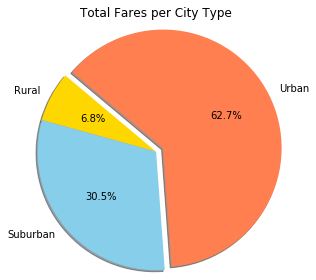

In [45]:
# Calculate Type Percents
total_fare_per_type = city_ride_df.groupby("type").sum()["fare"]
total_fare_per_type_pcnt = total_fare_per_type / sum(total_fare_per_type)

# Build Pie Chart
plt.pie(total_fare_per_type_pcnt,
        radius = 1.5,
        labels = city_type,
        autopct = "%1.1f%%",
        explode = [0, 0, 0.1],
        colors = facecolor,
        shadow = True,
        startangle = 140,
       )

plt.title("Total Fares per City Type\n\n") #need 2 lines so it does not appear on pie chart

# Save Figure
plt.tight_layout()
plt.savefig("total_fares.png")

# Show Figure
plt.show()

## Total Rides by City Type

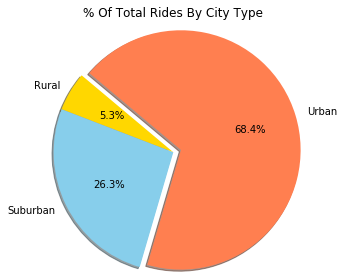

In [42]:
# Calculate Ride Percents
total_rides_city_type = city_ride_df.groupby("type").count()["ride_id"]
total_rides_city_type_pcnt = total_rides_city_type / total_rides_city_type.sum()

# Build Pie Chart
plt.pie(total_rides_city_type_pcnt,
       radius = 1.5,
        labels = city_type,
        autopct = "%1.1f%%",
        explode = [0, 0, 0.1],
        colors = facecolor,
        shadow = True,
        startangle = 140)

# set figure properties
plt.title("% of Total Rides by city type\n\n".title())

# Save Figure
plt.tight_layout()
plt.savefig("total_rides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

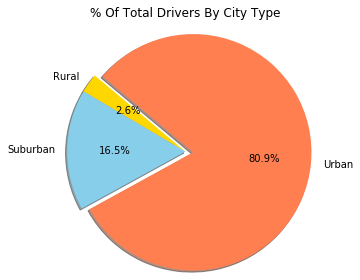

In [46]:
# Calculate Driver Percents
driver_city_type_df = city_ride_df.groupby("city").first()[["driver_count","type"]]
total_driver_city_type = driver_city_type_df.groupby("type").sum()["driver_count"]
total_driver_city_type_pcnt = total_driver_city_type / total_driver_city_type.sum()

# Build Pie Chart
plt.pie(total_driver_city_type_pcnt,
       radius = 1.5,
        labels = city_type,
        autopct = "%1.1f%%",
        explode = [0, 0, 0.1],
        colors = facecolor,
        shadow = True,
        startangle = 140)

# set figure properties
plt.title("% of Total Drivers by city type\n\n".title())

# Save Figure
plt.tight_layout()
plt.savefig("total_drivers.png")

# Show Figure
plt.show()

# 3 Observable Trends based on data:
1. In general, Urban city types have the most data and make up the majority of the dataset which makes sense when you put into consideration the population density for each of the city types.

2. The average fare price and the total number of rides per city have a downward trend. This means that the price is higher when there are less rides available. This may be due to the effect of price competition -- the lower frequency of rides allows for higher prices. 

3. The circle sizes are much larger on average for Urban cities which is indicative of the larger frequency in drivers. This point is also validated by the pie chart which shows the distribution of drivers in each city type.
